<a href="https://colab.research.google.com/github/bhaveshnaidu999/sentiment-analysis-on-amazon-fine-food-review/blob/main/Final_Seq2SeqImplementation__Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>**Sequence to sequence implementation**</font>

**There will be some functions that start with the word "grader" ex: grader_check_encoder(), grader_check_attention(), grader_onestepdecoder() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Note 1:**  There are many blogs on the attention mechanisum which might be misleading you,
 so do read the references completly and after that only please check the internet.
 The best things is to read the research papers and try to implement it on your own. 

**Note 2:** To complete this assignment, the reference that are mentioned will be enough.

**Note 3:** If you are starting this assignment, you might have completed minimum of 20 assignment.
 If  you are still not able to implement this algorithm you might have rushed in the previous assignments 
with out learning much and didn't spend your time productively.

## Task -1: Simple Encoder and Decoder
Implement simple Encoder-Decoder model

1. Download the **Italian** to **English** translation dataset from <a href="http://www.manythings.org/anki/ita-eng.zip">here</a>

2. You will find **ita.txt** file in that ZIP, 
you can read that data using python and preprocess that data this way only: 
<img src='https://i.imgur.com/z0j79Jf.png'>    
    
3. You have to implement a simple Encoder and Decoder architecture  

4. Use BLEU score as metric to evaluate your model. You can use any loss function you need.

5. You have to use Tensorboard to plot the Graph, Scores and histograms of gradients. 

6.  a. Check the reference notebook <br>
    b. <a href="https://medium.com/analytics-vidhya/understand-sequence-to-sequence-models-in-a-more-intuitive-way-1d517d8795bb">Resource 2</a>
    



<font color='blue'>**Load the data**</font>

In [ ]:
#loding the data  Data loading is the process of copying and loading data or data sets from a source file, folder or application to a database
!wget http://www.manythings.org/anki/ita-eng.zip
!unzip ita-eng.zip  

--2021-07-08 16:50:32--  http://www.manythings.org/anki/ita-eng.zip
Resolving www.manythings.org (www.manythings.org)... 172.67.173.198, 104.21.55.222, 2606:4700:3036::ac43:adc6, ...
Connecting to www.manythings.org (www.manythings.org)|172.67.173.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7692825 (7.3M) [application/zip]
Saving to: ‘ita-eng.zip’

ita-eng.zip         100%[===================>]   7.34M  13.6MB/s    in 0.5s    

2021-07-08 16:50:33 (13.6 MB/s) - ‘ita-eng.zip’ saved [7692825/7692825]

Archive:  ita-eng.zip
  inflating: ita.txt                 
  inflating: _about.txt              


In [ ]:
#importing the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd


In [ ]:
#importing the required libraries
import re
import tensorflow as tf


In [ ]:
#importing the required libraries
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
import numpy as np

In [ ]:
#opeining the file in read mode
#with open('ita.txt', 'r', encoding="utf8") as f:
  #  eng=[]
   # ita=[]
    """for i in f.readlines():
        eng.append(i.split("\t")[0])
        ita.append(i.split("\t")[1])
#converting the data to data frames and loading the data
data = pd.DataFrame(data=list(zip(eng, ita)), columns=['english','italian'])"""

In [ ]:
#opeining the file in read mode
with open('ita.txt', 'r', encoding="utf8") as f:
    eng=[]
    ita=[]
    for i in f.readlines():
        eng.append(i.split("\t")[0])
        ita.append(i.split("\t")[1])

In [ ]:
#converting the data to data frames and loading the data
df_data = pd.DataFrame(data=list(zip(eng, ita)), 
                        columns=['english','italian'])

In [ ]:
#to print the shape of the data
print(df_data.shape)

df_data.head()

(350360, 2)


,english,italian
0,Hi.,Ciao!
1,Hi.,Ciao.
2,Run!,Corri!
3,Run!,Corra!
4,Run!,Correte!


<font color='blue'>**Preprocess data**</font>

In [ ]:
def decontractions(data_phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    data_phrase = re.sub(r"won\'t", "will not", data_phrase)

    data_phrase = re.sub(r"can\'t", "can not", data_phrase)

    data_phrase = re.sub(r"won\’t", "will not", data_phrase)

    data_phrase = re.sub(r"can\’t", "can not", data_phrase)

     """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # general
    data_phrase = re.sub(r"n\'t", " not", data_phrase)

    data_phrase = re.sub(r"\'re", " are", data_phrase)

    data_phrase = re.sub(r"\'s", " is", data_phrase)

    data_phrase = re.sub(r"\'d", " would", data_phrase)

    data_phrase = re.sub(r"\'ll", " will", data_phrase)

    data_phrase = re.sub(r"\'t", " not", data_phrase)

    data_phrase = re.sub(r"\'ve", " have", data_phrase)

    data_phrase = re.sub(r"\'m", " am", data_phrase)

 """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    data_phrase = re.sub(r"n\’t", " not", data_phrase)

    data_phrase = re.sub(r"\’re", " are", data_phrase)

    data_phrase = re.sub(r"\’s", " is", data_phrase)

    data_phrase = re.sub(r"\’d", " would", data_phrase)

    data_phrase = re.sub(r"\’ll", " will", data_phrase)

    data_phrase = re.sub(r"\’t", " not", data_phrase)

    data_phrase = re.sub(r"\’ve", " have", data_phrase)
    
    data_phrase = re.sub(r"\’m", " am", data_phrase)

    return data_phrase

In [ ]:
def preprocess(pre_text):
    
    # convert all the text into lower letters

    pre_text = pre_text.lower()

    # use this function to remove the contractions: https://gist.github.com/anandborad/d410a49a493b56dace4f814ab5325bbd

    pre_text = decontractions(pre_text)
        
    # remove all the spacial characters: except space ' '

    pre_text = re.sub('[^A-Za-z0-9 ]+', '', pre_text)

    return pre_text

In [ ]:
def preprocess_ita(pre_ita_text):

    # convert all the text into lower letters

    pre_ita_text = pre_ita_text.lower()

     # remove the words betweent brakets ()

    pre_ita_text = decontractions(pre_ita_text)

    # remove these characters: {'$', ')', '?', '"', '’', '.',  '°', '!', ';', '/', "'", '€', '%', ':', ',', '('}

    pre_ita_text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', pre_ita_text)

    # replace these spl characters with space: '\u200b', '\xa0', '-', '/'
    # we have found these characters after observing the data points, feel free to explore more and see if you can do find more
    # you are free to do more proprocessing
    # note that the model will learn better with better preprocessed data 

    pre_ita_text = re.sub('\u200b', ' ', pre_ita_text)

    pre_ita_text = re.sub('\xa0', ' ', pre_ita_text)

    pre_ita_text = re.sub('-', ' ', pre_ita_text)
    
    return pre_ita_text

In [ ]:
df_data['english'] = df_data['english'].apply(preprocess)

df_data['italian'] = df_data['italian'].apply(preprocess_ita)

df_data.head()

,english,italian
0,hi,ciao
1,hi,ciao
2,run,corri
3,run,corra
4,run,correte


In [ ]:
df_data['italian_len'] = df_data['italian'].str.split().apply(len)

df_data = df_data[df_data['italian_len'] < 20]

In [ ]:
df_data['english_len'] = df_data['english'].str.split().apply(len)

df_data = df_data[df_data['english_len'] < 20]

In [ ]:
df_data['english_inp'] = '<start> ' + df_data['english'].astype(str)

df_data['english_out'] = df_data['english'].astype(str) + ' <end>'

In [ ]:
df_data = df_data.drop(['english','italian_len','english_len'], axis=1)

In [ ]:
# only for the first sentance add a toke <end> so that we will have <end> in tokenizer
df_data.head()

,italian,english_inp,english_out
0,ciao,<start> hi,hi <end>
1,ciao,<start> hi,hi <end>
2,corri,<start> run,run <end>
3,corra,<start> run,run <end>
4,correte,<start> run,run <end>


## Data Preparation 

In [ ]:
#impporting required libraris
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(df_data, test_size=0.2)

In [ ]:
print(train_data.shape, test_data.shape)

(279900, 3) (69975, 3)


In [ ]:
# for one sentence we will be adding <end> token so that the tokanizer learns the word <end>
# with this we can use only one tokenizer for both encoder output and decoder output
train_data.iloc[0]['english_inp']= str(train_data.iloc[0]['english_inp'])+' <end>'

In [ ]:
# for one sentence we will be adding <end> token so that the tokanizer learns the word <end>
# with this we can use only one tokenizer for both encoder output and decoder output
traitrain_datan.iloc[0]['english_out']= str(train_data.iloc[0]['english_out'])+' <end>'

In [ ]:
# for one sentence we will be adding <end> token so that the tokanizer learns the word <end>
# with this we can use only one tokenizer for both encoder output and decoder output
# tokenization
toknizer_ita = Tokenizer() 

toknizer_ita.fit_on_texts(train_data['italian'].values)

toknizer_eng = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')

toknizer_eng.fit_on_texts(train_data['english_inp'].values)

In [ ]:
 # vocab size of english corpus
vocabularry_size_eng = len(toknizer_eng.word_index.keys())     # vocab size of english corpus

print(vocabularry_size_eng)


# vocab size of italian corpus
vocabularry_size_ita = len(toknizer_ita.word_index.keys())     # vocab size of italian corpus

print(vocabularry_size_ita)

12990
26506


In [ ]:
# vocab size of english corpus# vocab size of english corpus
toknizer_eng.word_index['<start>'], toknizer_eng.word_index['<end>']

(1, 10236)

## <font color='blue'>**Implement custom encoder decoder**</font>

<font color='blue'>**Encoder**</font>

In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs, encoder_final_state_h, encoder_final_state_c
    ''''''
    Encoder model -- That takes a input sequence and returns encoder-outputs, encoder_final_state_h, encoder_final_state_c
    '''

    def __init__(self, inp_vocab_size, embedding_size, lstm_size, input_length):    
        super(Encoder, self).__init__()    # initializing encoder
        self.lstm_size = lstm_size                       
        self.input_length = input_length
        self.embedding_size =embedding_size
        self.inp_vocab_size = inp_vocab_size
        
        #Initialize Embedding layer

        #Initialize Embedding layer

        self.embedding = tf.keras.layers.Embedding(input_dim=self.inp_vocab_size, output_dim=self.embedding_size, input_length=self.input_length)
        
        #Intialize Encoder LSTM layer
         #Intialize Encoder LSTM layer
        self.lstm = tf.keras.layers.LSTM(self.lstm_size, return_sequences=True, return_state=True)

    def initialize_states(self,batch_size):
        '''
            Given a batch size it will return intial hidden state and intial cell state.
            If batch size is 32- Hidden state is zeros of size [32, lstm_units], cell state zeros is of size [32,lstm_units]
        ''' 
        return (tf.zeros([batch_size, self.lstm_size]), tf.zeros([batch_size, self.lstm_size]))   # intialize the encoder input state 
        '''
            Given a batch size it will return intial hidden state and intial cell state.
            If batch size is 32- Hidden state is zeros of size [32, lstm_units], cell state zeros is of size [32,lstm_units]
        ''' 


    def call(self, input_sequence, states):
        '''
          This function takes a sequence input and the initial states of the encoder.


          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        data_embed_enc = self.embedding(input_sequence)      # embed the input sequence

        output, state_h, state_c = self.lstm(data_embed_enc, initial_state=states)    # get the output of the encoder 

        return output, state_h, state_c

    
      

<font color='orange'>**Grader function - 1**</font>

In [ ]:
def grader_check_encoder():
    '''
        vocab-size: Unique words of the input language,
        embedding_size: output embedding dimension for each word after embedding layer,
        lstm_size: Number of lstm units,
        input_length: Length of the input sentence,
        batch_size
    '''
    vocab_size=10
    embedding_size=20
    lstm_size=32
    input_length=10
    batch_size=16
    #Intialzing encoder 
    encoder=Encoder(vocab_size, embedding_size, lstm_size, input_length)
    input_sequence=tf.random.uniform(shape=[batch_size,input_length], maxval=vocab_size, minval=0, dtype=tf.int32)
    #Intializing encoder initial states
    initial_state=encoder.initialize_states(batch_size)
    
    encoder_output, state_h, state_c=encoder(input_sequence, initial_state)
    
    assert(encoder_output.shape==(batch_size,input_length,lstm_size) and state_h.shape==(batch_size, lstm_size) and state_c.shape==(batch_size, lstm_size))
    return True
print(grader_check_encoder())

True


In [ ]:
class Decoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self, out_vocab_size, emb_size, lstm_size, input_length):
        """super(Decoder, self).__init__()
        self.lstm_size = lstm_size
        self.out_vocab_size = out_vocab_size
        self.input_length = input_length
        self.emb_size = emb_size"""
        super(Decoder, self).__init__()
        self.lstm_size = lstm_size

        
        self.out_vocab_size = out_vocab_size
        self.input_length = input_length
        self.emb_size = emb_size

        #Initialize Embedding layer
        self.embedding = tf.keras.layers.Embedding(input_dim=self.out_vocab_size, output_dim=self.emb_size, input_length=self.input_length)
        #Intialize Decoder LSTM layer
        self.lstm = tf.keras.layers.LSTM(self.lstm_size, return_sequences=True, return_state=True)
        
    def call(self, input_sequence, initial_states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm
        
          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''
        data_embed = self.embedding(input_sequence)
        
        lstm_out, state_h, state_c = self.lstm(data_embed, initial_states) 
        
        return lstm_out, state_h, state_c  

<font color='orange'>**Grader function - 2**</font>

In [ ]:
def grader_decoder():
    '''
        out_vocab_size: Unique words of the target language,
        embedding_size: output embedding dimension for each word after embedding layer,
        dec_units: Number of lstm units in decoder,
        input_length: Length of the input sentence,
        batch_size
        
    
    '''
    out_vocab_size=13 
    embedding_dim=12 
    input_length=10
    dec_units=16 
    batch_size=32
    
    target_sentences=tf.random.uniform(shape=(batch_size,input_length),maxval=10,minval=0,dtype=tf.int32)
    encoder_output=tf.random.uniform(shape=[batch_size, input_length, dec_units])
    state_h=tf.random.uniform(shape=[batch_size, dec_units])
    state_c=tf.random.uniform(shape=[batch_size, dec_units])
    states=[state_h,state_c]
    decoder=Decoder(out_vocab_size, embedding_dim, dec_units, input_length )
    output,_,_=decoder(target_sentences, states)
    assert(output.shape==(batch_size, input_length, dec_units))
    return True
print(grader_decoder())


True


## Creating data pipeline

In [ ]:
class Dataset:
    def __init__(self, df_data, toknizer_ita, toknizer_eng, maximum_len):

        self.encoder_inps = df_data['italian'].values
        self.decoder_inps = df_data['english_inp'].values
        """self.encoder_inps = df_data['italian'].values
        self.decoder_inps = df_data['english_inp'].values
        self.decoder_outs = df_data['english_out'].values
        self.toknizer_eng = toknizer_eng
        self.toknizer_ita = toknizer_ita
        self.maximum_len = maximum_len"""
        self.decoder_outs = df_data['english_out'].values
        self.toknizer_eng = toknizer_eng
        self.toknizer_ita = toknizer_ita
        self.maximum_len = maximum_len

    def __getitem__(self, i):
        self.encoder_seq = self.toknizer_ita.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values

        self.decoder_inp_seq = self.toknizer_eng.texts_to_sequences([self.decoder_inps[i]])

        self.decoder_out_seq = self.toknizer_eng.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, 
                                            maxlen=self.maximum_len, 
                                            dtype='int32', 
                                            padding='post')

        """self.encoder_seq = pad_sequences(self.encoder_seq, 
                                            maxlen=self.maximum_len, 
                                            dtype='int32', 
                                            padding='post')"""                                    

        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, 
                                            maxlen=self.maximum_len, 
                                            dtype='int32', 
                                            padding='post')

        """self.encoder_seq = pad_sequences(self.encoder_seq, 
                                            maxlen=self.maximum_len, 
                                            dtype='int32', 
                                            padding='post')"""     

        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, 
                                            maxlen=self.maximum_len, 
                                            dtype='int32', 
                                            padding='post')

        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)


In [ ]:
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, final_data_set, batch_size=1):
        self.final_data_set = final_data_set
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.final_data_set.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.final_data_set[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]


        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq

        
        return tuple([[batch[0], batch[1]], batch[2]])

    """def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size"""

    # your model.fit_gen requires this function
    
    def __len__(self):  

        return len(self.indexes) // self.batch_size

    """def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)"""

    def on_epoch_end(self):

        self.indexes = np.random.permutation(self.indexes)

In [ ]:
"""class Encoder_decoder(tf.keras.Model):

    def __init__(self, encoder_inputs_length, decoder_inputs_length, output_vocab_size):
        super(Encoder_decoder, self).__init__()
        self.encoder_inputs_length = encoder_inputs_length
        self.decoder_inputs_length = decoder_inputs_length
        self.output_vocab_size = output_vocab_size
        #Create encoder object
        self.encoder = Encoder(inp_vocab_size=vocab_size_ita+1, embedding_size=50, input_length=self.encoder_inputs_length, lstm_size=128)
        #Create decoder object
        self.decoder = Decoder(out_vocab_size=vocab_size_eng+1, embedding_size=50, input_length=self.decoder_inputs_length, lstm_size=128)
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        self.dense = Dense(self.output_vocab_size, activation='softmax')"""



        

final_train_dataset = Dataset(train, toknizer_ita, toknizer_eng, 20)

In [ ]:
final_test_dataset  = Dataset(test, tknizer_ita, tknizer_eng, 20)

In [ ]:
final_train_dataloader = Dataloder(final_train_dataset, batch_size=1024)

In [ ]:
final_test_dataloader = Dataloder(final_test_dataset, batch_size=1024)

In [ ]:
print(final_train_dataloader[0][0][0].shape, final_train_dataloader[0][0][1].shape, final_train_dataloader[0][1].shape)

(1024, 20) (1024, 20) (1024, 20)


In [ ]:
"""class Encoder_decoder(tf.keras.Model):

    def __init__(self, encoder_inputs_length, decoder_inputs_length, output_vocab_size):
        super(Encoder_decoder, self).__init__()
        self.encoder_inputs_length = encoder_inputs_length
        self.decoder_inputs_length = decoder_inputs_length
        self.output_vocab_size = output_vocab_size
        #Create encoder object
        self.encoder = Encoder(inp_vocab_size=vocab_size_ita+1, embedding_size=50, input_length=self.encoder_inputs_length, lstm_size=128)
        #Create decoder object
        self.decoder = Decoder(out_vocab_size=vocab_size_eng+1, embedding_size=50, input_length=self.decoder_inputs_length, lstm_size=128)
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        self.dense = Dense(self.output_vocab_size, activation='softmax')
    
    def call(self, data):
        '''
        A. Pass the input sequence to Encoder layer -- Return encoder_output, encoder_final_state_h, encoder_final_state_c
        B. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h, encoder_final_state_C
        C. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs
        '''
        initial_state = self.encoder.initialize_states(1024) 

        input, output = data[0], data[1]                
        encoder_output, encoder_h, encoder_c = self.encoder(input, states=initial_state)
        initial_state = [encoder_h, encoder_c]
        decoder_output ,_ , _ = self.decoder(output, initial_state)
        output = self.dense(decoder_output)   
        return output """

In [ ]:
class Encoder_decoder(tf.keras.Model):

    def __init__(self, enc_inputs_length, dec_inputs_length, output_vocab_size):
        super(Encoder_decoder, self).__init__()
        self.enc_inputs_length = enc_inputs_length
        self.dec_inputs_length = dec_inputs_length
        """self.enc_inputs_length = enc_inputs_length
        self.dec_inputs_length = dec_inputs_length
        self.output_vocab_size = output_vocab_size
        """
        self.output_vocab_size = output_vocab_size


        #Create encoder object

        self.encoder_data = Encoder(inp_vocab_size=vocab_size_ita+1, 
                                    embedding_size=50, 
                                    input_length=self.enc_inputs_length, 
                                    lstm_size=128)
        #Create decoder object
         """input, output = data[0], data[1]                
        encoder_output, encoder_h, encoder_c = self.encoder(input, states=initial_state)
        initial_state = [encoder_h, encoder_c]
        decoder_output ,_ , _ = self.decoder(output, initial_state)
        output = self.dense(decoder_output)  
        """
        self.decoder_data = Decoder(out_vocab_size=vocab_size_eng+1, 
                                    embedding_size=50, 
                                    input_length=self.dec_inputs_length, 
                                    lstm_size=128)
        
        
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        self.dense = Dense(self.output_vocab_size, activation='softmax')
    
    def call(self, final_data):
        '''
        A. Pass the input sequence to Encoder layer -- Return encoder_output, encoder_final_state_h, encoder_final_state_c
        B. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h, encoder_final_state_C
        C. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs
        '''
        initial_state = self.encoder.initialize_states(1024) 

        input, output = final_data[0], final_data[1]  

        encoder_output, encoder_h, encoder_c = self.encoder(input, states=initial_state)


        initial_state = [encoder_h, encoder_c]

        decoder_data_output ,_ , _ = self.decoder(output, initial_state)
        data_output = self.dense(decoder_data_output)   
        return data_output 

In [ ]:
#Create an object of encoder_decoder Model class, 
# Compile the model and fit the model
model  = Encoder_decoder(encoder_inputs_length=20, 
                        decoder_inputs_length=20, 
                        output_vocab_size=vocab_size_eng)

optimizer = tf.keras.optimizers.Adam()

"""# Compile the model and fit the model
model  = Encoder_decoder(encoder_inputs_length=20,  decoder_inputs_length=20, output_vocab_size=vocab_size_eng)"""

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')

train_steps = train.shape[0]//1024




test_steps = test.shape[0]//1024


#Create an object of encoder_decoder Model class, 
# Compile the model and fit the model
model.fit(train_dataloader, 
            steps_per_epoch=train_steps, 
            epochs=50, 
            validation_data=train_dataloader, 
            validation_steps=test_steps)

model.summary()

Epoch 1/50
273/273 [==============================] - 60s 211ms/step - loss: 2.6373 - val_loss: 1.7395
Epoch 2/50
273/273 [==============================] - 56s 206ms/step - loss: 1.6386 - val_loss: 1.5611
Epoch 3/50
273/273 [==============================] - 56s 206ms/step - loss: 1.5100 - val_loss: 1.4413
Epoch 4/50
273/273 [==============================] - 56s 206ms/step - loss: 1.3581 - val_loss: 1.2714
Epoch 5/50
273/273 [==============================] - 56s 206ms/step - loss: 1.2080 - val_loss: 1.1463
Epoch 6/50
273/273 [==============================] - 56s 206ms/step - loss: 1.1005 - val_loss: 1.0479
Epoch 7/50
273/273 [==============================] - 57s 208ms/step - loss: 1.0142 - val_loss: 0.9666
Epoch 8/50
273/273 [==============================] - 57s 209ms/step - loss: 0.9348 - val_loss: 0.8900
Epoch 9/50
273/273 [==============================] - 57s 209ms/step - loss: 0.8600 - val_loss: 0.8187
Epoch 10/50
273/273 [==============================] - 56s 206ms/step - l

In [ ]:
def predict(data_input_sentence):
    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to decoder
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predicted_out,state_h,state_c=model.layers[1](dec_input,states)
         pass the predicted_out to the dense layer
         update the states=[state_h,state_c]
         And get the index of the word with maximum probability of the dense layer output, using the tokenizer(word index) get the word and then store it in a string.
         Update the input_to_decoder with current predictions
    F. Return the predicted sentence
    '''
    final_test_source_seq = toknizer_ita.texts_to_sequences([data_input_sentence])
    
    data_encoder = model.layers[0]    # encoder


    data_decoder = model.layers[1]    # decoder
    dense = model.layers[2]      # dense layer

    # initialize encoder state for one sequence # initialize encoder state for one sequence 
    en_initial_states = data_encoder.initialize_states(1)      # initialize encoder state for one sequence 
    
    
    # encoder output shape# encoder output shape
    en_outputs = data_encoder(tf.constant(test_source_seq), en_initial_states)      

    de_final_input = tf.constant([[toknizer_eng.word_index['<start>']]])   # int of '<start>' token 

    de_final_state_h, de_final_state_c = en_outputs[1:]   # hidden states of encoder 

    ''' A. Given input sentence, convert the sentence into integers using tokenizer used earlier B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state C. Initialize index of <start> as input to decoder. and encoder final states as input_states to decoder D. till we reach max_length of decoder or till the model predicted word <end>: predicted_out,state_h,state_c=model.layers[1](dec_input,states) pass the predicted_out to the dense layer update the states=[state_h,state_c] And get the index of the word with maximum probability of the dense layer output, using the tokenizer(word index) get the word and then store it in a string. Update the input_to_decoder with current predictions F. Return the predicted sentence '''
    out_words = []


    while True:
        de_final_output, de_final_state_h, de_final_state_c = decoder(de_input, [de_final_state_h, de_final_state_c])   
        # given first word and hidden state to the decoder give decoder o/p and hidden state 


        de_final_output = dense(de_final_output)            # o/p of decoder is passed to dense layer having softmax activation 


        de_final_input = tf.argmax(de_final_output, -1)      # get the index of the max values of the dense layer

        if de_input.numpy()[0][0] == 0:          # if its first index append noting
            data_out_words.append('')    
        else:# get the word corresponding to the highest index and append it to out_words 
            data_out_words.append(tknizer_eng.index_word[de_final_input.numpy()[0][0]])   
            

        if data_out_words[-1] == '<end>' or len(data_out_words) >= 20:     # if last word is '<end>' or len(out_words)>20 break
            break

    return ' '.join(out_data_out_wordswords)   # join all the words in out_words


In [ ]:
import random



In [ ]:
pick = [i for i in random.sample(range(0, test.shape[0]), 1000)]   # sample random 1000 index from the range of 0 to len(test) 


In [ ]:
"""italic = [test['italian'].values[i] for i in pick]                 # 1000 random italian sentences
eng_out = [test['english_out'].values[i] for i in pick]            # 1000 random english sentences"""

In [ ]:
italic = [test['italian'].values[i] for i in pick]                 # 1000 random italian sentences
"""italic = [test['italian'].values[i] for i in pick]                 # 1000 random italian sentences
eng_out = [test['english_out'].values[i] for i in pick]            # 1000 random english sentences"""

english_out = [test['english_out'].values[i] for i in pick]            # 1000 random english sentences

In [ ]:
predictions_final = [predict(i) for i in italic]     # predictions on the 1000 italian sentences 

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.# https://www.nltk.org/_modules/nltk/translate/bleu_score.html# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences. # https://www.nltk.org/_modules/nltk/translate/bleu_score.html from  nltk.translate.bleu_score import sentence_bleu bleu_list = [] for i in range(len(italic)): bleu_list.append(sentence_bleu(eng_out[i].split(), predictions[i].split())) print(sum(bleu_list)/len(bleu_list))
from  nltk.translate.bleu_score import sentence_bleu

In [ ]:

# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.# https://www.nltk.org/_modules/nltk/translate/bleu_score.html# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences. # https://www.nltk.org/_modules/nltk/translate/bleu_score.html from  nltk.translate.bleu_score import sentence_bleu bleu_list = [] for i in range(len(italic)): bleu_list.append(sentence_bleu(eng_out[i].split(), predictions[i].split())) print(sum(bleu_list)/len(bleu_list))

data_bleu_list = []

In [ ]:
for i in range(len(italic)):
    data_bleu_list.append(sentence_bleu(english_out[i].split(), predictions_final[i].split()))

In [ ]:

print(sum(data_bleu_list)/len(data_bleu_list))

0.05582433130462054


## Task -2: Including Attention mechanisum

1. Use the preprocessed data from Task-1

2. You have to implement an Encoder and Decoder architecture with  
attention as discussed in the reference notebook.

    * Encoder   - with 1 layer LSTM <br>
    * Decoder   - with 1 layer LSTM<br>
    * attention -  (Please refer the <a href= 'https://drive.google.com/file/d/1z_bnc-3aubKawbR6q8wyI6Mh5ho2R1aZ/view?usp=sharing'>**reference notebook**</a> to know more about the attention mechanism.)
3. In Global attention, we have 3 types of scoring functions(as discussed in the reference notebook).
 As a part of this assignment **you need to create 3 models for each scoring function**
<img src='https://i.imgur.com/iD2jZo3.png'>

    * In model 1 you need to implemnt "dot" score function
    * In model 2 you need to implemnt "general" score function
    * In model 3 you need to implemnt "concat" score function.<br>
    
 **Please do add the markdown titles for each model so that we can have a better look at the code and verify.**
4. It is mandatory to train the model with simple model.fit() only, Donot train the model with custom GradientTape()

5. Using attention weights, you can plot the attention plots, 
please plot those for 2-3 examples. You can check about those in <a href="https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate">this</a>

6. The attention layer has to be written by yourself only. 
The main objective of this assignment is to read and implement a paper on yourself so please do it yourself.  

7. Please implement the class **onestepdecoder** as mentioned in the assignment instructions.

8. You can use any tf.Keras highlevel API's to build and train the models. 
 Check the reference notebook for better understanding.

9. Use BLEU score as metric to evaluate your model. You can use any loss function you need.

10. You have to use Tensorboard to plot the Graph, Scores and histograms of gradients. 

11. Resources:
    a. Check the reference notebook
    b. <a href="https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/">Resource 1</a>
    c. <a href="https://www.tensorflow.org/tutorials/text/nmt_with_attention">Resource 2</a>
    d. <a href="https://stackoverflow.com/questions/44238154/what-is-the-difference-between-luong-attention-and-bahdanau-attention#:~:text=Luong%20attention%20used%20top%20hidden,hidden%20state%20at%20time%20t.">Resource 3</a>
    

### <font color='blue'>**Implement custom encoder decoder and attention layers**</font>

<font color='blue'>**Encoder**</font>

In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''
    #def __init__(self, inp_vocab_size, embedding_size, lstm_size, input_length): super(Encoder, self).__init__() self.inp_vocab_size = inp_vocab_size self.embedding_size = embedding_size self.lstm_size = lstm_size self.input_length = input_length #Initialize Embedding layer self.embedding = tf.keras.layers.Embedding(input_dim=self.inp_vocab_size, output_dim=self.embedding_size, input_length=self.input_length) #Intialize Encoder LSTM layer self.lstm = tf.keras.layers.LSTM(self.lstm_size, return_sequences=True, return_state=True) def call(self,input_sequence,states): ''' This function takes a sequence input and the initial states of the encoder. Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm returns -- All encoder_outputs, last time steps hidden and cell state ''' embed_enc = self.embedding(input_sequence) output, state_h, state_c = self.lstm(embed_enc, initial_state=states) return output, state_h, state_c
    def __init__(self, input_vocab_size, emb_size, lstm_size, input_length):


        super(Encoder, self).__init__()

        self.input_vocab_size = input_vocab_size

        self.emb_size = emb_size

        self.lstm_size = lstm_size


        """ #Initialize Embedding layer
        self.embedding = tf.keras.layers.Embedding(input_dim=self.input_vocab_size, output_dim=self.embedding_size, input_length=self.input_length)
        #Intialize Encoder LSTM layer
        self.lstm = tf.keras.layers.LSTM(self.lstm_size, return_sequences=True, return_state=True)"""



        self.input_length = input_length


        #Initialize Embedding layer
        self.embedding = tf.keras.layers.Embedding(input_dim=self.input_vocab_size, 
                                                    output_dim=self.emb_size, 
                                                    input_length=self.input_length)
        #Intialize Encoder LSTM layer
         #Intialize Encoder LSTM layer
        self.lstm = tf.keras.layers.LSTM(self.lstm_size, 
                                            return_sequences=True, 
                                            return_state=True)
'''
    Encoder model -- That takes a input sequence and returns output sequence
    '''
    def call(self, final_input_sequence,states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- All encoder_outputs, last time steps hidden and cell state
        '''
        final_embed_enc = self.embedding(final_input_sequence)



        final_output, final_state_h, final_state_c = self.lstm(final_embed_enc, initial_state=states)


        return final_output, final_state_h, final_state_c

    
    def initialize_states(self, final_batch_size):
        '''
        Given a batch size it will return intial hidden state and intial cell state.
        If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
        '''
        return (tf.zeros([final_batch_size, self.lstm_size]), tf.zeros([batchfinal_batch_size_size, self.lstm_size]))


<font color='cyan'>**Grader function - 1**</font>

In [ ]:
def grader_check_encoder():
    
    '''
        vocab-size: Unique words of the input language,
        embedding_size: output embedding dimension for each word after embedding layer,
        lstm_size: Number of lstm units in encoder,
        input_length: Length of the input sentence,
        batch_size
    '''
    
    vocab_size=10
    embedding_size=20
    lstm_size=32
    input_length=10
    batch_size=16
    encoder=Encoder(vocab_size, embedding_size, lstm_size, input_length)
    input_sequence=tf.random.uniform(shape=[batch_size,input_length],maxval=vocab_size,minval=0,dtype=tf.int32)
    initial_state=encoder.initialize_states(batch_size)
    encoder_output,state_h,state_c=encoder(input_sequence,initial_state)
    
    assert(encoder_output.shape==(batch_size, input_length, lstm_size) and state_h.shape==(batch_size, lstm_size) and state_c.shape==(batch_size, lstm_size))
    return True
print(grader_check_encoder())

True


<font color='blue'>**Attention**</font>

In [ ]:
class Attention(tf.keras.layers.Layer):                     # i have added one more argument dec_units which is decoder units to Attention class 
    '''
    Class the calculates score based on the scoring_function using Bahdanu attention mechanism.
    '''#class Attention(tf.keras.layers.Layer): #class One_Step_Decoder(tf.keras.Model): def __init__(self, tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units): # Initialize decoder embedding layer, LSTM and any other objects needed super(One_Step_Decoder, self).__init__() self.attention = Attention(score_fun , att_units, dec_units) self.att_units = att_units self.dec_units = dec_units self.embedding = tf.keras.layers.Embedding(tar_vocab_size, embedding_dim) self.lstm = tf.keras.layers.LSTM(dec_units, return_sequences=True, return_state=True) self.ws = tf.keras.layers.Dense(tar_vocab_size) def call(self, input_to_decoder, encoder_output, state_h, state_c): ''' One step decoder mechanisim step by step: A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size, 1, embedding_dim) B. Using the encoder_output and decoder hidden state, compute the context vector. C. Concat the context vector with the step A output D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state) E. Pass the decoder output to dense layer(vocab size) and store the result into output. F. Return the states from step D, output from Step E, attention weights from Step -B ''' embed = self.embedding(input_to_decoder)  # embed encoder input context, alignment = self.attention(state_h, encoder_output)    # get context from decoder state and encoder output concat_out = tf.concat([context, tf.squeeze(embed, 1)], 1)           # concat embedding and context concat_out = tf.expand_dims(concat_out,1) lstm_out, state_h, state_c = self.lstm(concat_out)    # pass concated vec to lstm of decoder logits = self.ws(lstm_out) logits = tf.reshape(logits, [logits.shape[0], logits.shape[2]]) return logits, state_h, state_c, alignment, context            # return o/p                    # i have added one more argument dec_units which is decoder units to Attention class ''' Class the calculates score based on the scoring_function using Bahdanu attention mechanism. ''' def __init__(self, scoring_function, att_units, dec_units): super(Attention, self).__init__() self.scoring_function = scoring_function # Please go through the reference notebook and research paper to complete the scoring functions if self.scoring_function=='dot': # Intialize variables needed for Dot score function here pass if scoring_function == 'general': # Intialize variables needed for General score function here self.wa = tf.keras.layers.Dense(dec_units) elif scoring_function == 'concat': # Intialize variables needed for Concat score function here self.W1 = tf.keras.layers.Dense(att_units) self.W2 = tf.keras.layers.Dense(att_units) self.V = tf.keras.layers.Dense(1) def call(self, decoder_hidden_state, encoder_output): ''' Attention mechanism takes two inputs current step -- decoder_hidden_state and all the encoder_outputs. * Based on the scoring function we will find the score or similarity between decoder_hidden_state and encoder_output. Multiply the score function with your encoder_outputs to get the context vector. Function returns context vector and attention weights(softmax - scores) ''' if self.scoring_function == 'dot': # Implement Dot score function here decoder_hidden_state = tf.expand_dims(decoder_hidden_state, 1) score = tf.matmul(decoder_hidden_state, encoder_output, transpose_b=True) score = tf.transpose(score, [0, 2, 1]) alignment = tf.nn.softmax(score, axis=1) context = tf.matmul(alignment, encoder_output, transpose_a=True) context = tf.reshape(context, [context.shape[0],context.shape[2]]) return context, alignment elif self.scoring_function == 'general': # Implement General score function here decoder_hidden_state = tf.expand_dims(decoder_hidden_state, 2) score = tf.keras.layers.Dot(axes=(2,1))([self.wa(encoder_output), decoder_hidden_state]) alignment = tf.nn.softmax(score, axis=1) context = tf.matmul(alignment, encoder_output, transpose_a=True) context = tf.reshape(context, [context.shape[0],context.shape[2]]) return context, alignment elif self.scoring_function == 'concat': # Implement General score function here decoder_hidden_state = tf.expand_dims(decoder_hidden_state, 1) score= self.V(tf.nn.tanh(self.W1(decoder_hidden_state) + self.W2(encoder_output))) alignment = tf.nn.softmax(score, axis=1)                                              # applying softmax layer context = tf.matmul(alignment, encoder_output, transpose_a=True)                      # get context context = tf.reshape(context, [context.shape[0],context.shape[2]]) return context, alignment
    def __init__(self, final_scoring_function, attention_units, final_decode_units):
        super(Attention, self).__init__()
        self.final_scoring_function = final_scoring_function
        # Please go through the reference notebook and research paper to complete the scoring functions

        if self.final_scoring_function=='dot':

        # Intialize variables needed for Dot score function here

            pass
        if final_scoring_function == 'general':


        # Intialize variables needed for General score function here
            self.wa = tf.keras.layers.Dense(final_decode_units) 

            
        elif final_scoring_function == 'concat':
        # Intialize variables needed for Concat score function here
            self.W1 = tf.keras.layers.Dense(attention_units)

            self.W2 = tf.keras.layers.Dense(attention_units)



            self.V = tf.keras.layers.Dense(1)

    def call(self, final_decoder_hidden_state, final_encoder_output):
        '''
        Attention mechanism takes two inputs current step -- decoder_hidden_state and all the encoder_outputs.
        * Based on the scoring function we will find the score or similarity between decoder_hidden_state and encoder_output.
        Multiply the score function with your encoder_outputs to get the context vector.
        Function returns context vector and attention weights(softmax - scores)'''"""
        Attention mechanism takes two inputs current step -- decoder_hidden_state and all the encoder_outputs.
        * Based on the scoring function we will find the score or similarity between decoder_hidden_state and encoder_output.
        Multiply the score function with your encoder_outputs to get the context vector.
        Function returns context vector and attention weights(softmax - scores)
        '''
        '''"""
        if self.scoring_function == 'dot':
            # Implement Dot score function here

            final_decoder_hidden_state = tf.expand_dims(final_decoder_hidden_state, 1)


            last_score = tf.matmul(final_decoder_hidden_state, 
                            final_encoder_output, 
                            transpose_b=True)
            score = tf.transpose(last_score, [0, 2, 1])


            alignment = tf.nn.softmax(last_score, axis=1)

            f_context = tf.matmul(alignment, 
                                final_encoder_output, 
                                transpose_a=True)
            conf_contextext = tf.reshape(context, 
                                [context.shape[0],
                                f_context.shape[2]])
            return f_context, alignment 

        elif self.final_scoring_function == 'general':
            # Implement General score function here
            decoder_hidden_state = tf.expand_dims(final_decoder_hidden_state, 2)



            last_score = tf.keras.layers.Dot(axes=(2,1))([self.wa(final_encoder_output), 
                                                        final_decoder_hidden_state])


            alignment = tf.nn.softmax(last_score, axis=1)

            """ # Implement General score function here
            decoder_hidden_state = tf.expand_dims(final_decoder_hidden_state, 2)"""
            f_context = tf.matmul(alignment, final_encoder_output, transpose_a=True)

            f_context = tf.reshape(f_context, [f_context.shape[0],f_context.shape[2]])
            return f_context, alignment 

        elif self.final_scoring_function == 'concat':
            # Implement General score function here
            decoder_hidden_state = tf.expand_dims(final_decoder_hidden_state, 1)

            
            last_score= self.V(tf.nn.tanh(self.W1(final_decoder_hidden_state) + self.W2(final_encoder_output)))            
            alignment = tf.nn.softmax(last_score, axis=1)                                             
            
             # applying softmax layer
            f_context = tf.matmul(alignment, final_encoder_output, transpose_a=True)                      
            
            # get context 
            f_context = tf.reshape(f_context, [f_context.shape[0],f_context.shape[2]])
            return f_context, alignment 

<font color='cyan'>**Grader function - 2**</font>

In [ ]:
def grader_check_attention(scoring_fun):             
    
    ''' 
        att_units: Used in matrix multiplications for scoring functions,
        input_length: Length of the input sentence,
        batch_size
    '''
    
    input_length=10
    batch_size=16
    att_units=32
    
    state_h=tf.random.uniform(shape=[batch_size, att_units])
    encoder_output=tf.random.uniform(shape=[batch_size, input_length, att_units])
    attention=Attention(scoring_fun, att_units, att_units)          # i have added extra argument here 
    context_vector, attention_weights = attention(state_h, encoder_output)
    assert(context_vector.shape==(batch_size, att_units) and attention_weights.shape==(batch_size, input_length, 1))
    return True
print(grader_check_attention('dot'))     
print(grader_check_attention('general'))   
print(grader_check_attention('concat'))    

True
True
True


<font color='blue'>**OneStepDecoder**</font>

In [ ]:
class One_Step_Decoder(tf.keras.Model):
  def __init__(self, final_tar_vocab_size, embed_dim, input_length, decode_units ,score_fun ,att_units):
      # Initialize decoder embedding layer, LSTM and any other objects needed#class One_Step_Decoder(tf.keras.Model): def __init__(self, tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units): # Initialize decoder embedding layer, LSTM and any other objects needed super(One_Step_Decoder, self).__init__() self.attention = Attention(score_fun , att_units, dec_units) self.att_units = att_units self.dec_units = dec_units self.embedding = tf.keras.layers.Embedding(tar_vocab_size, embedding_dim) self.lstm = tf.keras.layers.LSTM(dec_units, return_sequences=True, return_state=True) self.ws = tf.keras.layers.Dense(tar_vocab_size) def call(self, input_to_decoder, encoder_output, state_h, state_c): ''' One step decoder mechanisim step by step: A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size, 1, embedding_dim) B. Using the encoder_output and decoder hidden state, compute the context vector. C. Concat the context vector with the step A output D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state) E. Pass the decoder output to dense layer(vocab size) and store the result into output. F. Return the states from step D, output from Step E, attention weights from Step -B ''' embed = self.embedding(input_to_decoder)  # embed encoder input context, alignment = self.attention(state_h, encoder_output)    # get context from decoder state and encoder output concat_out = tf.concat([context, tf.squeeze(embed, 1)], 1)           # concat embedding and context concat_out = tf.expand_dims(concat_out,1) lstm_out, state_h, state_c = self.lstm(concat_out)    # pass concated vec to lstm of decoder logits = self.ws(lstm_out) logits = tf.reshape(logits, [logits.shape[0], logits.shape[2]]) return logits, state_h, state_c, alignment, context            # return o/p
      super(One_Step_Decoder, self).__init__()

      self.attention = Attention(score_fun , att_units, dec_units)


      self.att_units = att_units


      #""" One step decoder mechanisim step by step: A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size, 1, embedding_dim) B. Using the encoder_output and decoder hidden state, compute the context vector. C. Concat the context vector with the step A output D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state) E. Pass the decoder output to dense layer(vocab size) and store the result into output. F. Return the states from step D, output from Step E, attention weights from Step -B"""
      self.decode_units = decode_units

      self.embedding = tf.keras.layers.Embedding(final_tar_vocab_size, embed_dim)

      self.lstm = tf.keras.layers.LSTM(dec_units, return_sequences=True, return_state=True)



      self.ws = tf.keras.layers.Dense(final_tar_vocab_size) 


  def call(self, input_to_decoder, encoder_output, state_h, state_c):
      '''
        One step decoder mechanisim step by step:
      A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size, 1, embedding_dim)
      B. Using the encoder_output and decoder hidden state, compute the context vector.
      C. Concat the context vector with the step A output
      D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state)
      E. Pass the decoder output to dense layer(vocab size) and store the result into output.
      F. Return the states from step D, output from Step E, attention weights from Step -B
      '''

      last_embed = self.embedding(input_to_decoder)  
      # embed encoder input
      final_context, alignment = self.attention(state_h, encoder_output)    
      # get context from decoder state and encoder output
      concat_out = tf.concat([final_context, 
      tf.squeeze(last_embed, 1)], 1)           
      
      # concat embedding and context
      concat_out = tf.expand_dims(concat_out,1)
      final_lstm_out, state_h, state_c = self.lstm(concat_out)    
      
      # pass concated vec to lstm of decoder 
      logits = self.ws(final_lstm_out)
        """# pass concated vec to lstm of decoder 
      logits = self.ws(final_lstm_out)"""
      logits = tf.reshape(logits, 
                        [logits.shape[0], 
                        logits.shape[2]])

      return logits, state_h, state_c, alignment, final_context            # return o/p 

<font color='cyan'>**Grader function - 3**</font>

In [ ]:
def grader_onestepdecoder(score_fun):
    
    '''
        tar_vocab_size: Unique words of the target language,
        embedding_dim: output embedding dimension for each word after embedding layer,
        dec_units: Number of lstm units in decoder,
        att_units: Used in matrix multiplications for scoring functions in attention class,
        input_length: Length of the target sentence,
        batch_size
        
    '''
    
    tar_vocab_size=13 
    embedding_dim=12 
    input_length=10
    dec_units=16 
    att_units=16
    batch_size=32
    onestepdecoder=One_Step_Decoder(tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)
    input_to_decoder=tf.random.uniform(shape=(batch_size, 1), maxval=10, minval=0, dtype=tf.int32)
    encoder_output=tf.random.uniform(shape=[batch_size, input_length, dec_units])
    state_h=tf.random.uniform(shape=[batch_size, dec_units])    
    state_c=tf.random.uniform(shape=[batch_size, dec_units])     
    output, state_h, state_c, attention_weights, context_vector = onestepdecoder(input_to_decoder, encoder_output, state_h, state_c)
    assert(output.shape==(batch_size, tar_vocab_size))
    assert(state_h.shape==(batch_size, dec_units)) 
    assert(state_c.shape==(batch_size, dec_units)) 
    assert(attention_weights.shape==(batch_size, input_length, 1))
    assert(context_vector.shape==(batch_size, dec_units))
    return True

print(grader_onestepdecoder('dot'))
print(grader_onestepdecoder('general'))
print(grader_onestepdecoder('concat'))


True
True
True


<font color='blue'>**Decoder**</font>

In [ ]:
class Decoder(tf.keras.Model):
    
    def __init__(self, final_out_vocab_size, last_embedding_dim, max_input_length, last_dec_units ,score_function , att_units):
      #Intialize necessary variables and create an object from the class onestepdecoderclass Decoder(tf.keras.Model): def __init__(self, final_out_vocab_size, last_embedding_dim, input_length, last_dec_units ,score_fun , att_units): #Intialize necessary variables and create an object from the class onestepdecoder super(Decoder, self).__init__() self.final_out_vocab_size = final_out_vocab_size self.last_embedding_dim = last_embedding_dim self.input_length = input_length self.last_dec_units = last_dec_units self.score_fun = score_fun self.att_units = att_units self.One_Step_Decoder = One_Step_Decoder(self.final_out_vocab_size, self.last_embedding_dim, self.input_length, self.last_dec_units , self.score_fun, self.att_units) def call(self, input_to_decoder, encoder_output, decoder_hidden_state, decoder_cell_state ): #Initialize an empty Tensor array, that will store the outputs at each and every time step all_outputs = tf.TensorArray(tf.float32, size=tf.shape(input_to_decoder)[1], name="output_arrays") # #Create a tensor array as shown in the reference notebook #Iterate till the length of the decoder input for timestep in range(tf.shape(input_to_decoder)[1]): # Call onestepdecoder for each token in decoder_input output, decoder_hidden_state, decoder_cell_state, attention_weights, context_vector = self.One_Step_Decoder(input_to_decoder[:,timestep:timestep+1], encoder_output, decoder_hidden_state, decoder_cell_state) # Store the output in tensorarray all_outputs = all_outputs.write(timestep, output) all_outputs = tf.transpose(all_outputs.stack(), [1,0,2]) # Return the tensor array return all_outputs def initialize_states(self, batch_size): ''' Given a batch size it will return intial hidden state and intial cell state. If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units] ''' return (tf.zeros([batch_size, self.dec_units]), tf.zeros([batch_size, self.dec_units]))
        super(Decoder, self).__init__()

        self.final_out_vocab_size = final_out_vocab_size

        self.last_embedding_dim = last_embedding_dim

        self.max_input_length = max_input_length 

        self.last_dec_units = last_dec_units

        self.score_function = score_function

        self.att_units = att_units  

        self.One_Step_Decoder = One_Step_Decoder(self.final_out_vocab_size, self.last_embedding_dim, self.max_input_length, self.last_dec_units , self.score_function, self.att_units)

    def call(self, final_input_to_decoder, last_encoder_output, final_decoder_hidden_state, decoder_cell_state ):

        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        all_outputs = tf.TensorArray(tf.float32, size=tf.shape(final_input_to_decoder)[1], name="output_arrays") #
        #Create a tensor array as shown in the reference notebook
        
        #Iterate till the length of the decoder input
        for timestep in range(tf.shape(input_to_decoder)[1]):
            # Call onestepdecoder for each token in decoder_input
            output, decoder_hidden_state, decoder_cell_state, attention_weights, context_vector = self.One_Step_Decoder(
                                                                                final_input_to_decoder[:,timestep:timestep+1], 
                                                                                last_encoder_output, 
                                                                                final_decoder_hidden_state, 
                                                                                decoder_cell_state) 
            # Store the output in tensorarray
            all_outputs = all_outputs.write(timestep, output)

        all_outputs = tf.transpose(all_outputs.stack(), [1,0,2])
        # Return the tensor array
        return all_outputs

    def initialize_states(self, max_batch_size):
        '''
        Given a batch size it will return intial hidden state and intial cell state.
        If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
        ''''''
        Given a batch size it will return intial hidden state and intial cell state.
        If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
        '''
        return (tf.zeros([max_batch_size, self.dec_units]), tf.zeros([max_batch_size, self.dec_units]))



<font color='cyan'>**Grader function - 4**</font>

In [ ]:
def grader_decoder(score_fun):
    
    '''
        out_vocab_size: Unique words of the target language,
        embedding_dim: output embedding dimension for each word after embedding layer,
        dec_units: Number of lstm units in decoder,
        att_units: Used in matrix multiplications for scoring functions in attention class,
        input_length: Length of the target sentence,
        batch_size
        
    
    '''
    
    out_vocab_size=13 
    embedding_dim=12 
    input_length=11
    dec_units=16 
    att_units=16
    batch_size=32
    
    target_sentences=tf.random.uniform(shape=(batch_size, input_length),maxval=10,minval=0,dtype=tf.int32)
    encoder_output = tf.random.uniform(shape=[batch_size, input_length, dec_units])                  
    state_h=tf.random.uniform(shape=[batch_size, dec_units])
    state_c=tf.random.uniform(shape=[batch_size, dec_units])
    
    decoder = Decoder(out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)
    output = decoder(target_sentences,encoder_output, state_h, state_c)
    assert(output.shape==(batch_size, input_length, out_vocab_size))
    return True
print(grader_decoder('dot'))
print(grader_decoder('general'))
print(grader_decoder('concat'))

True
True
True


<font color='blue'>**Encoder Decoder model**</font>

In [ ]:
class encoder_decoder(tf.keras.Model):         # passing decoder init state to deoder and not encoder init state
  def __init__(self, final_vocab_size_en, max_embedding_size_en, max_lstm_size_en, final_input_length_en, last_batch_size,
               last_out_vocab_size_de, embedding_dim_de, input_length_de, dec_units ,score_fun ,att_units):
      """super(encoder_decoder, self).__init__()      
      #Intialize objects from encoder
      self.vocab_size_en = vocab_size_en
      self.embedding_size_en = embedding_size_en
      self.lstm_size_en = lstm_size_en
      self.input_length_en = input_length_en
      self.batch_size = batch_size
      self.encoder = Encoder(self.vocab_size_en, self.embedding_size_en, self.lstm_size_en, self.input_length_en)  # Encoder
      self.initial_state = self.encoder.initialize_states(self.batch_size)"""


      super(encoder_decoder, self).__init__()  

      
      #Intialize objects from encoder
      #Intialize objects from encoder
      self.final_vocab_size_en = final_vocab_size_en

      self.max_embedding_size_en = max_embedding_size_en

      self.max_lstm_size_en = max_lstm_size_en



      self.final_input_length_en = final_input_length_en

      self.last_batch_size = last_batch_size
      self.encoder = Encoder(self.final_vocab_size_en, 
                              self.max_embedding_size_en, 
                              self.max_lstm_size_en, 
                              self.final_input_length_en)  
      
      # Encoder
      self.initial_state = self.encoder.initialize_states(self.last_batch_size)
      
      #Intialize objects from decoder
      self.last_out_vocab_size_de = last_out_vocab_size_de 


      self.embedding_dim_de = embedding_dim_de 
      """self.input_length_de = input_length_de
      self.dec_units = dec_units 
      self.att_units = att_units"""
      
      self.input_length_de = input_length_de
      self.dec_units = dec_units 
      self.att_units = att_units


      self.score_fun = score_fun
      self.decoder = Decoder(self.last_out_vocab_size_de, 
                              self.embedding_dim_de, 
                              self.input_length_de, 
                              self.dec_units, 
                              self.score_fun, 
                              self.att_units)  
      
      # Decoder
      self.initial_state_decoder = self.decoder.initialize_states(self.batch_size)

  def call(self, df_data):
    input_sequence, target_sentences = df_data[0], df_data[1]
    #Intialize encoder states, Pass the encoder_sequence to the embedding layer
    encoder_output, state_h, state_c = self.encoder(input_sequence, self.initial_state)
    # Decoder initial states are encoder final states, Initialize it accordingly
    # Pass the decoder sequence,encoder_output, decoder states to Decoder
    final_decoder_output = self.decoder(target_sentences, encoder_output, self.initial_state_decoder[0], self.initial_state_decoder[1])   # get the output of the decoder 
    # return the decoder output
    return final_decoder_output

<font color='blue'>**Custom loss function**</font>

In [ ]:
#https://www.tensorflow.org/tutorials/text/image_captioning#model
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
    """ Custom loss function that will not consider the loss for padded zeros.
    why are we using this, can't we use simple sparse categorical crossentropy?
    Yes, you can use simple sparse categorical crossentropy as loss like we did in task-1. But in this loss function we are ignoring the loss
    for the padded zeros. i.e when the input is zero then we donot need to worry what the output is. This padded zeros are added from our end
    during preprocessing to make equal length for all the sentences.

    """
    
    
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

<font color='blue'>**Training**</font>

<font color='blue'>**Training with dot scoring function**</font>

Implement dot function here.

In [ ]:
# Implement teacher forcing while training your model. You can do it two ways.
# Prepare your data, encoder_input, decoder_input and decoder_output
# if decoder input is 
# <start> Hi how are you
# decoder output should be
# Hi How are you <end>
# i.e when you have send <start>-- decoder predicted Hi, 'Hi' decoder predicted 'How' .. e.t.c

# or
 
# model.fit([train_ita, train_eng], train_eng[:,1:]..)
# Note: If you follow this approach some grader functions might return false and this is fine.

In [ ]:
# Implement teacher forcing while training your model. You can do it two ways.
# Prepare your data, encoder_input, decoder_input and decoder_output
# if decoder input is 
# <start> Hi how are you
max_vocab_size_en = vocabularry_size_ita+1

max_embedding_size_en = 50

best_lstm_size_en = 128

max_input_length_en = 20

max_batch_size = 1024

In [ ]:
final_out_vocab_size_de = vocabularry_size_eng+1 


final_embedding_dim_de = 50

max_input_length_de = 20

In [ ]:


dec_units = 128
value_of_score_fun = 'dot'
att_units = 128


In [ ]:
#encoder_decoder_model = encoder_decoder(max_vocab_size_en, max_embedding_size_en, best_lstm_size_en, max_input_length_en, batch_size, final_out_vocab_size_de, final_embedding_dim_de, max_input_length_de, dec_units , value_of_score_fun , att_units)


encoder_decoder_model = encoder_decoder(max_vocab_size_en, 
                                        max_embedding_size_en, 
                                        best_lstm_size_en, 
                                        max_input_length_en, 
                                        batch_size,
                                        final_out_vocab_size_de, 
                                        final_embedding_dim_de, 
                                        max_input_length_de, 
                                        dec_units ,
                                        value_of_score_fun ,
                                        att_units)

In [ ]:
optimizer = tf.keras.optimizers.Adam()



In [ ]:
#encoder_decoder_model = encoder_decoder(max_vocab_size_en, max_embedding_size_en, best_lstm_size_en, max_input_length_en, batch_size, final_out_vocab_size_de, final_embedding_dim_de, max_input_length_de, dec_units , value_of_score_fun , att_units)


encoder_decoder_model.compile(optimizer=optimizer, loss=loss_function)

In [ ]:
total_train_steps = train_data.shape[0]//1024

In [ ]:
total_test_steps = test_data.shape[0]//1024

In [ ]:
"""encoder_decoder_model.fit(train_dataloader, 
                            steps_per_epoch=total_train_steps, 
                            epochs=50, """


encoder_decoder_model.fit(train_dataloader, 
                            steps_per_epoch=total_train_steps, 
                            epochs=50, 
                            validation_data=train_dataloader, 
                            validation_steps=total_test_steps)

Epoch 1/50
273/273 [==============================] - 92s 323ms/step - loss: 1.9930 - val_loss: 1.7389
Epoch 2/50
273/273 [==============================] - 88s 323ms/step - loss: 1.6406 - val_loss: 1.5277
Epoch 3/50
273/273 [==============================] - 88s 320ms/step - loss: 1.4397 - val_loss: 1.3646
Epoch 4/50
273/273 [==============================] - 98s 359ms/step - loss: 1.3125 - val_loss: 1.2563
Epoch 5/50
273/273 [==============================] - 88s 322ms/step - loss: 1.2162 - val_loss: 1.1594
Epoch 6/50
273/273 [==============================] - 98s 359ms/step - loss: 1.1237 - val_loss: 1.0704
Epoch 7/50
273/273 [==============================] - 99s 361ms/step - loss: 1.0396 - val_loss: 0.9900
Epoch 8/50
273/273 [==============================] - 88s 321ms/step - loss: 0.9603 - val_loss: 0.9128
Epoch 9/50
273/273 [==============================] - 88s 323ms/step - loss: 0.8847 - val_loss: 0.8360
Epoch 10/50
273/273 [==============================] - 99s 361ms/step - l

## <font color='blue'>**Inference**</font>

<font color='blue'>**Plot attention weights**</font>

In [ ]:
def plot_attention(attestion_data, final_italic_sentence, best_prediction):   # given attention matrix/list of lists italic sentence and prediction from encoder_decoder model get the plot 
    #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate# given attention matrix/list of lists italic sentence and prediction from encoder_decoder model get the plot #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate
    final_new_att = []  
    
     # getting attention weights 
    for i in range(len(attestion_data)):
        at = [i[0] for i in att[i].numpy()[0]] 
        final_new_att.append(at)
        
    final_fig = plt.figure(figsize=(10, 10))

    axis_last = final_fig.add_subplot(1, 1, 1)

    axis_last.matshow(final_new_att)         
    # ploting  # given attention matrix/list of lists italic sentence and prediction from encoder_decoder model get the plot #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate
    axis_last.set_xticklabels([''] + final_italic_sentence.split(' '), rotation=90)
    axis_last.set_yticklabels([''] + best_prediction)


    plt.show()    

<font color='blue'>**Predict the sentence translation**</font>

In [ ]:
def predict(final_input_sentence):##''' A. Given input sentence, convert the sentence into integers using tokenizer used earlier B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder. D. till we reach max_length of decoder or till the model predicted word <end>: predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states) Save the attention weights And get the word using the tokenizer(word index) and then store it in a string. E. Call plot_attention(#params) F. Return the predicted sentence '''
    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''

    best_test_source_seq = tknizer_ita.texts_to_sequences([final_input_sentence])

    if len(best_test_source_seq[0]) == 0:
        return "not a italic word"

    encoder = encoder_decoder_model.layers[0]
    
    english_initial_states = encoder.initialize_states(1)

    decoder_init = encoder_decoder_model.layers[1].initialize_states(1)

    encoder_output, state_h, state_c = encoder(tf.constant(best_test_source_seq), 
                                                english_initial_states)

    decoder_input = tf.constant([[tknizer_eng.word_index['<start>']]])

    save_attention = []

    out_words = []

    while True:
        predictions, state_h, state_c, attention_weights, context_vector = encoder_decoder_model.layers[1].layers[0](de_input, 
                                                                                                                        encoder_output, 
                                                                                                                        decoder_init[0], 
                                                                                                                        decoder_init[1])
        save_attention.append(attention_weights)

        decoder_input = tf.argmax(predictions, -1)
    
        if decoder_input.numpy()[0] == 0:
            out_words.append('')       
        
        else:
            out_words.append(tknizer_eng.index_word[decoder_input.numpy()[0]])

        if out_words[-1] == '<end>' or len(out_words) >= 20:#or out_words[0] == out_words[-1]:
            break
            
        decoder_input = tf.constant([[decoder_input.numpy()[0]]])

    plot_attention(save_attention, input_sentence, out_words)
    
    return ' '.join(out_words)

In [ ]:
import random
pick = [i for i in random.sample(range(0, test.shape[0]), 1000)]
italic = [test['italian'].values[i] for i in pick]
eng_out = [test['english_out'].values[i] for i in pick]

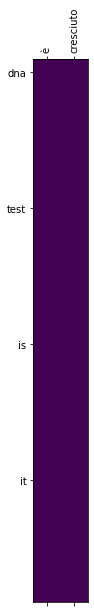

'dna test is it is it is it is it is it is it is it is it is it'

In [ ]:
predict(italic[405])

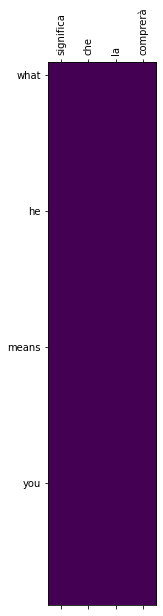

'what he means you want that mean tom how you want that mean tom how you want that mean tom'

In [ ]:
predict(italic[80])

In [ ]:
# encoder_decoder_model.save_weights('attention_model.h5')
# encoder_decoder_model.load_weights('attention_model.h5')

<font color='blue'>**Calculate BLEU score**</font>

In [ ]:
def predict_eng(input_sentence):
    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''

    test_source_seq = tknizer_ita.texts_to_sequences([input_sentence])
    if len(test_source_seq[0]) == 0:
        return "not a italic word"
    encoder = encoder_decoder_model.layers[0]
    
    en_initial_states = encoder.initialize_states(1)
    
    decoder_init = encoder_decoder_model.layers[1].initialize_states(1)

    encoder_output, state_h, state_c = encoder(tf.constant(test_source_seq), en_initial_states)

    de_input = tf.constant([[tknizer_eng.word_index['<start>']]])

    save_attention = []   # add attention weights for each each decoding step 
    out_words = []
    while True:
        predictions, state_h, state_c, attention_weights, context_vector = encoder_decoder_model.layers[1].layers[0](de_input, encoder_output, decoder_init[0], decoder_init[1])
        save_attention.append(attention_weights)

        de_input = tf.argmax(predictions, -1)
    
        if de_input.numpy()[0] == 0:
            out_words.append(' ')       
        
        else:
            out_words.append(tknizer_eng.index_word[de_input.numpy()[0]])

        if out_words[-1] == '<end>' or len(out_words) >= 20:#or out_words[0] == out_words[-1]:
            break
            
        de_input = tf.constant([[de_input.numpy()[0]]])

    return ' '.join(out_words)

In [ ]:
predictions = [predict_eng(i) for i in italic]  # prediction for random 1000 text data points   

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html

import warnings
warnings.filterwarnings('ignore')

from  nltk.translate.bleu_score import sentence_bleu
bleu_list = []
for i in range(len(predictions)):
    bleu_list.append(sentence_bleu(eng_out[i].split(), predictions[i].split()))

print(sum(bleu_list)/len(bleu_list))   #bleu score 

0.1519385873664515


## Model-2 with "general" Score

<font color='blue'>**Repeat the same steps for General scoring function**</font>

In [ ]:
#Create an object of your custom model.
#Compile and train your model on dot scoring function.

vocab_size_en = vocab_size_ita+1
embedding_size_en = 50
lstm_size_en = 128
input_length_en = 256
batch_size = 1024
out_vocab_size_de = vocab_size_eng+1 
embedding_dim_de = 50
input_length_de = 20
dec_units = 512
score_fun = 'general'  # dot function  
att_units = 1024

encoder_decoder_model_general = encoder_decoder(vocab_size_en, embedding_size_en, lstm_size_en, input_length_en, batch_size,
                                        out_vocab_size_de, embedding_dim_de, input_length_de, dec_units ,score_fun ,att_units)        # initializing encoder_decoder model with 'dot' score function


In [ ]:
optimizer = tf.keras.optimizers.Adam()
encoder_decoder_model_general.compile(optimizer=optimizer, loss=loss_function)

In [ ]:
train_steps = train.shape[0]//1024      
test_steps = test.shape[0]//1024         

encoder_decoder_model_general.fit(train_dataloader, steps_per_epoch=train_steps, epochs=50, validation_data=train_dataloader, validation_steps=test_steps)

Epoch 1/50
273/273 [==============================] - 165s 590ms/step - loss: 1.8873 - val_loss: 1.6370
Epoch 2/50
273/273 [==============================] - 160s 585ms/step - loss: 1.5135 - val_loss: 1.4210
Epoch 3/50
273/273 [==============================] - 160s 587ms/step - loss: 1.3729 - val_loss: 1.3117
Epoch 4/50
273/273 [==============================] - 161s 588ms/step - loss: 1.2783 - val_loss: 1.2336
Epoch 5/50
273/273 [==============================] - 166s 609ms/step - loss: 1.2112 - val_loss: 1.1741
Epoch 6/50
273/273 [==============================] - 161s 590ms/step - loss: 1.1478 - val_loss: 1.1039
Epoch 7/50
273/273 [==============================] - 161s 590ms/step - loss: 1.0799 - val_loss: 1.0355
Epoch 8/50
273/273 [==============================] - 166s 609ms/step - loss: 1.0139 - val_loss: 0.9752
Epoch 9/50
273/273 [==============================] - 161s 589ms/step - loss: 0.9531 - val_loss: 0.9143
Epoch 10/50
273/273 [==============================] - 161s 589m

In [ ]:
def predict(input_sentence):
    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''

    test_source_seq = tknizer_ita.texts_to_sequences([input_sentence])
    if len(test_source_seq[0]) == 0:
        return "not a italic word"
    encoder = encoder_decoder_model_general.layers[0]
    
    en_initial_states = encoder.initialize_states(1)

    decoder_init = encoder_decoder_model_general.layers[1].initialize_states(1)

    encoder_output, state_h, state_c = encoder(tf.constant(test_source_seq), en_initial_states)

    de_input = tf.constant([[tknizer_eng.word_index['<start>']]])

    save_attention = []
    out_words = []
    while True:
        predictions, state_h, state_c, attention_weights, context_vector = encoder_decoder_model_general.layers[1].layers[0](de_input, encoder_output, decoder_init[0], decoder_init[1])
        save_attention.append(attention_weights)

        de_input = tf.argmax(predictions, -1)
    
        if de_input.numpy()[0] == 0:
            out_words.append('')       
        
        else:
            out_words.append(tknizer_eng.index_word[de_input.numpy()[0]])

        if out_words[-1] == '<end>' or len(out_words) >= 20:#or out_words[0] == out_words[-1]:
            break
            
        de_input = tf.constant([[de_input.numpy()[0]]])

    plot_attention(save_attention, input_sentence, out_words)
    
    return ' '.join(out_words)

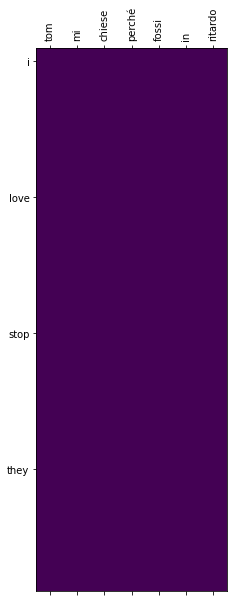

'i love stop they hated ask stop they hated ask stop they hated ask stop they hated ask stop they'

In [ ]:
# Visualize few sentences randomly in Test data

predict(italic[400])

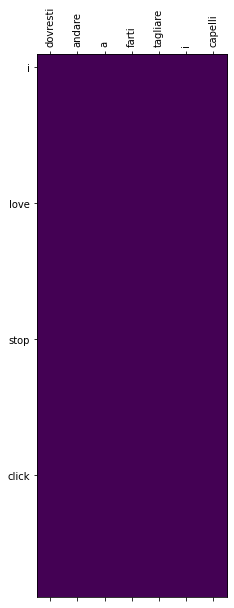

'i love stop click explaining sorry assistance i love stop click explaining sorry assistance i love stop click explaining sorry'

In [ ]:
predict(italic[4])

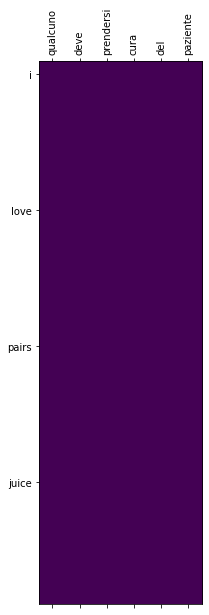

'i love pairs juice assistance i love pairs juice assistance i love pairs juice assistance i love pairs juice assistance'

In [ ]:
predict(italic[896])

In [ ]:
def predict_eng(input_sentence):
    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''

    test_source_seq = tknizer_ita.texts_to_sequences([input_sentence])
    if len(test_source_seq[0]) == 0:
        return "not a italic word"
    encoder = encoder_decoder_model_general.layers[0]
    
    en_initial_states = encoder.initialize_states(1)
    
    decoder_init = encoder_decoder_model_general.layers[1].initialize_states(1)

    encoder_output, state_h, state_c = encoder(tf.constant(test_source_seq), en_initial_states)

    de_input = tf.constant([[tknizer_eng.word_index['<start>']]])

    save_attention = []   # add attention weights for each each decoding step 
    out_words = []
    while True:
        predictions, state_h, state_c, attention_weights, context_vector = encoder_decoder_model_general.layers[1].layers[0](de_input, encoder_output, decoder_init[0], decoder_init[1])
        save_attention.append(attention_weights)

        de_input = tf.argmax(predictions, -1)
    
        if de_input.numpy()[0] == 0:
            out_words.append(' ')       
        
        else:
            out_words.append(tknizer_eng.index_word[de_input.numpy()[0]])

        if out_words[-1] == '<end>' or len(out_words) >= 20:#or out_words[0] == out_words[-1]:
            break
            
        de_input = tf.constant([[de_input.numpy()[0]]])

    return ' '.join(out_words)

In [ ]:
predictions_general = [predict_eng(i) for i in italic]  # prediction for random 1000 text data points

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html

import warnings
warnings.filterwarnings('ignore')

from  nltk.translate.bleu_score import sentence_bleu
bleu_list = []
for i in range(len(predictions)):
    bleu_list.append(sentence_bleu(eng_out[i].split(), predictions_general[i].split()))

print(sum(bleu_list)/len(bleu_list))   #bleu score 

0.39905063172540034


<font color='blue'>**Repeat the same steps for Concat scoring function**</font>

In [ ]:
#Compile and train your model on concat scoring function.
# Visualize few sentences randomly in Test data
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html

In [ ]:
#Create an object of your custom model.
#Compile and train your model on dot scoring function.

vocab_size_en = vocab_size_ita+1
embedding_size_en = 50
lstm_size_en = 256
input_length_en = 20
batch_size = 1024
out_vocab_size_de = vocab_size_eng+1 
embedding_dim_de = 50
input_length_de = 20
dec_units = 512
score_fun = 'concat'
att_units = 1024

encoder_decoder_model_concat = encoder_decoder(vocab_size_en, embedding_size_en, lstm_size_en, input_length_en, batch_size,
                                        out_vocab_size_de, embedding_dim_de, input_length_de, dec_units ,score_fun ,att_units)  # initializing encoder_decoder model with 'concat' score function

In [ ]:
optimizer = tf.keras.optimizers.Adam()
encoder_decoder_model_concat.compile(optimizer=optimizer, loss=loss_function)

In [ ]:
train_steps = train.shape[0]//1024      
test_steps = test.shape[0]//1024         

encoder_decoder_model_concat.fit(train_dataloader, steps_per_epoch=train_steps, epochs=50, validation_data=train_dataloader, validation_steps=test_steps) 

In [ ]:
def predict(input_sentence):
    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''

    test_source_seq = tknizer_ita.texts_to_sequences([input_sentence])
    if len(test_source_seq[0]) == 0:
        return "not a italic word"
    encoder = encoder_decoder_model_concat.layers[0]
    
    en_initial_states = encoder.initialize_states(1)

    decoder_init = encoder_decoder_model_concat.layers[1].initialize_states(1)

    encoder_output, state_h, state_c = encoder(tf.constant(test_source_seq), en_initial_states)

    de_input = tf.constant([[tknizer_eng.word_index['<start>']]])

    save_attention = []
    out_words = []
    while True:
        predictions, state_h, state_c, attention_weights, context_vector = encoder_decoder_model_concat.layers[1].layers[0](de_input, encoder_output, decoder_init[0], decoder_init[1])
        save_attention.append(attention_weights)

        de_input = tf.argmax(predictions, -1)
    
        if de_input.numpy()[0] == 0:
            out_words.append('')       
        
        else:
            out_words.append(tknizer_eng.index_word[de_input.numpy()[0]])

        if out_words[-1] == '<end>' or len(out_words) >= 20:#or out_words[0] == out_words[-1]:
            break
            
        de_input = tf.constant([[de_input.numpy()[0]]])

    plot_attention(save_attention, input_sentence, out_words)
    
    return ' '.join(out_words)

In [ ]:
predict(italic[400])

In [ ]:
predict(italic[4])

In [ ]:
predict(italic[827])

In [ ]:
def predict_eng(input_sentence):
    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''

    test_source_seq = tknizer_ita.texts_to_sequences([input_sentence])
    if len(test_source_seq[0]) == 0:
        return "not a italic word"
    encoder = encoder_decoder_model_concat.layers[0]
    
    en_initial_states = encoder.initialize_states(1)
    
    decoder_init = encoder_decoder_model_concat.layers[1].initialize_states(1)

    encoder_output, state_h, state_c = encoder(tf.constant(test_source_seq), en_initial_states)

    de_input = tf.constant([[tknizer_eng.word_index['<start>']]])

    save_attention = []   # add attention weights for each each decoding step 
    out_words = []
    while True:
        predictions, state_h, state_c, attention_weights, context_vector = encoder_decoder_model_concat.layers[1].layers[0](de_input, encoder_output, decoder_init[0], decoder_init[1])
        save_attention.append(attention_weights)

        de_input = tf.argmax(predictions, -1)
    
        if de_input.numpy()[0] == 0:
            out_words.append(' ')       
        
        else:
            out_words.append(tknizer_eng.index_word[de_input.numpy()[0]])

        if out_words[-1] == '<end>' or len(out_words) >= 20:#or out_words[0] == out_words[-1]:
            break
            
        de_input = tf.constant([[de_input.numpy()[0]]])

    return ' '.join(out_words)

In [ ]:
predictions_concat = [predict_eng(i) for i in italic] # prediction for random 1000 text data points

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
 
import warnings
warnings.filterwarnings('ignore')

from  nltk.translate.bleu_score import sentence_bleu

bleu_list = []
for i in range(len(predictions_concat)):
    bleu_list.append(sentence_bleu(eng_out[i].split(), predictions_concat[i].split()))

print(sum(bleu_list)/len(bleu_list))

In [ ]:
# observation 
# The prediction from encoder_decoder model with "dot" scoring function gives bleu score of 0.11 and 
# with "general" and "concat" scoring function blue socres are 0.049 and 0.16 respectively. we can observe that
# encoder_decoder model with "concat" scoring gives high bleu followed by "dot" and "general".  